# Loading CICDoS2019 dataset

In [ ]:
import glob
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from joblib import dump

In [ ]:
dfs = []
data_dir = 'data'
csv_files = glob.glob(os.path.join(data_dir, '**', '*.csv'), recursive=True)

# check if 'data/combined_df.csv' exists
combined_csv = 'data/combined_data.csv'

if os.path.exists(combined_csv):
    print(f"Loading existing {combined_csv}")
    combined_df = pd.read_csv(combined_csv)
else:
    print(f"Creating {combined_csv }")
    # for data_file in csv_files[:1]: # for testing
    for data_file in csv_files:
        print("Loading dataset:", data_file)
        df = pd.read_csv(data_file, low_memory=False)
        df.columns = df.columns.str.strip()

        # Drop unnecessary columns
        # df.drop(columns=['Timestamp', 'Flow ID', 'SimillarHTTP'], inplace=True)
        # df.drop(columns=['Timestamp', 'SimillarHTTP'], inplace=True)

        # Encode labels as binary (benign or not)
        df['Label'] = df['Label'].apply(lambda x: 1 if x == 'BENIGN' else 0)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.to_csv(combined_csv , index=False)


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
combined_df['Source IP'] = label_encoder.fit_transform(combined_df['Source IP'])
combined_df['Destination IP'] = label_encoder.fit_transform(combined_df['Destination IP'])

# Split the data into features and target
X = combined_df.drop(columns=['Label'])
y = combined_df['Label']

# Replace infinite or very large values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Features used in FlowGuard

selected_features = [
    'Source IP', 'Source Port', 'Destination IP', 'Destination Port',
    'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
    'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
    'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
    'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
    'Bwd Header Length'
]

X = X[selected_features]

In [ ]:
def classify(predictions, threshold=0.5):
    return [1 if pred >= threshold else 0 for pred in predictions]

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_class = classify(y_pred)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred_class))

def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))

# Train classifiers
classifiers = {
    "ID3 Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    # "Random Forest Classifier": RandomForestClassifier(),
    "Linear Regression": LinearRegression(),
}

for name, classifier in classifiers.items():
    print("Training", name, "...")
    classifier.fit(X_train, y_train)
    # evaluate_classifier(classifier, X_test, y_test)
    # Evaluate Linear Regression model for classification
    evaluate_model(linear_reg_model, X_test, y_test)
    print('-----------------------------------\n')

    # Save the model
    # dump(classifier, f'{name}_combined_model.joblib')
    # print("Model saved.")

In [ ]:


# Assuming you have your dataset loaded into a DataFrame called 'data'
# # Separate features and target variable
# X = data.drop(columns=['target_column'])
# y = data['target_column']

# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Applying ML on the datasete

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd

from run import load_config
from loader import load_processed_data, split_X_y


config = load_config()
# Load the processed data
df = load_processed_data(config)
X, y = split_X_y(config, df)

2024-07-10 17:24:34.158023: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 17:24:34.160655: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 17:24:34.171364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 17:24:34.192558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 17:24:34.192586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 17:24:34.205583: I tensorflow/core/platform/cpu_feature_guard.cc:

--------------------------------------------------
Config: {'data': 'data/combined_data.csv', 'processed_data': 'data/processed_data.csv', 'class_type': 'binary', 'debug': False, 'split': {'test_size': 0.048, 'train_data_size': 30000000, 'test_data_size': 100000}}
--------------------------------------------------
Loading existing processed data: data/processed_data.csv...
--------------------------------------------------


In [3]:
X, y = split_X_y(config, df.head(2000))

--------------------------------------------------


/cluster/home/guru/research/anti-flowguard/loader.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


Epoch 1/10


/cluster/home/guru/research/anti-flowguard/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Precision: 1.0000 - Recall: 0.6891 - accuracy: 0.6891 - f1_score: 1.0000 - loss: 0.6101 - val_Precision: 1.0000 - val_Recall: 0.9150 - val_accuracy: 0.9150 - val_f1_score: 1.0000 - val_loss: 0.3210
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 1.0000 - Recall: 0.9369 - accuracy: 0.9369 - f1_score: 1.0000 - loss: 0.3057 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1746
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 1.0000 - Recall: 0.9873 - accuracy: 0.9873 - f1_score: 1.0000 - loss: 0.1777 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1078
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 1.0000 - Recall: 0.9986 - accuracy: 0.9986 - f1_score: 1.0000 - loss: 0.1177 - val_Precision: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.0734
Epoch 5/10

/cluster/home/guru/research/anti-flowguard/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


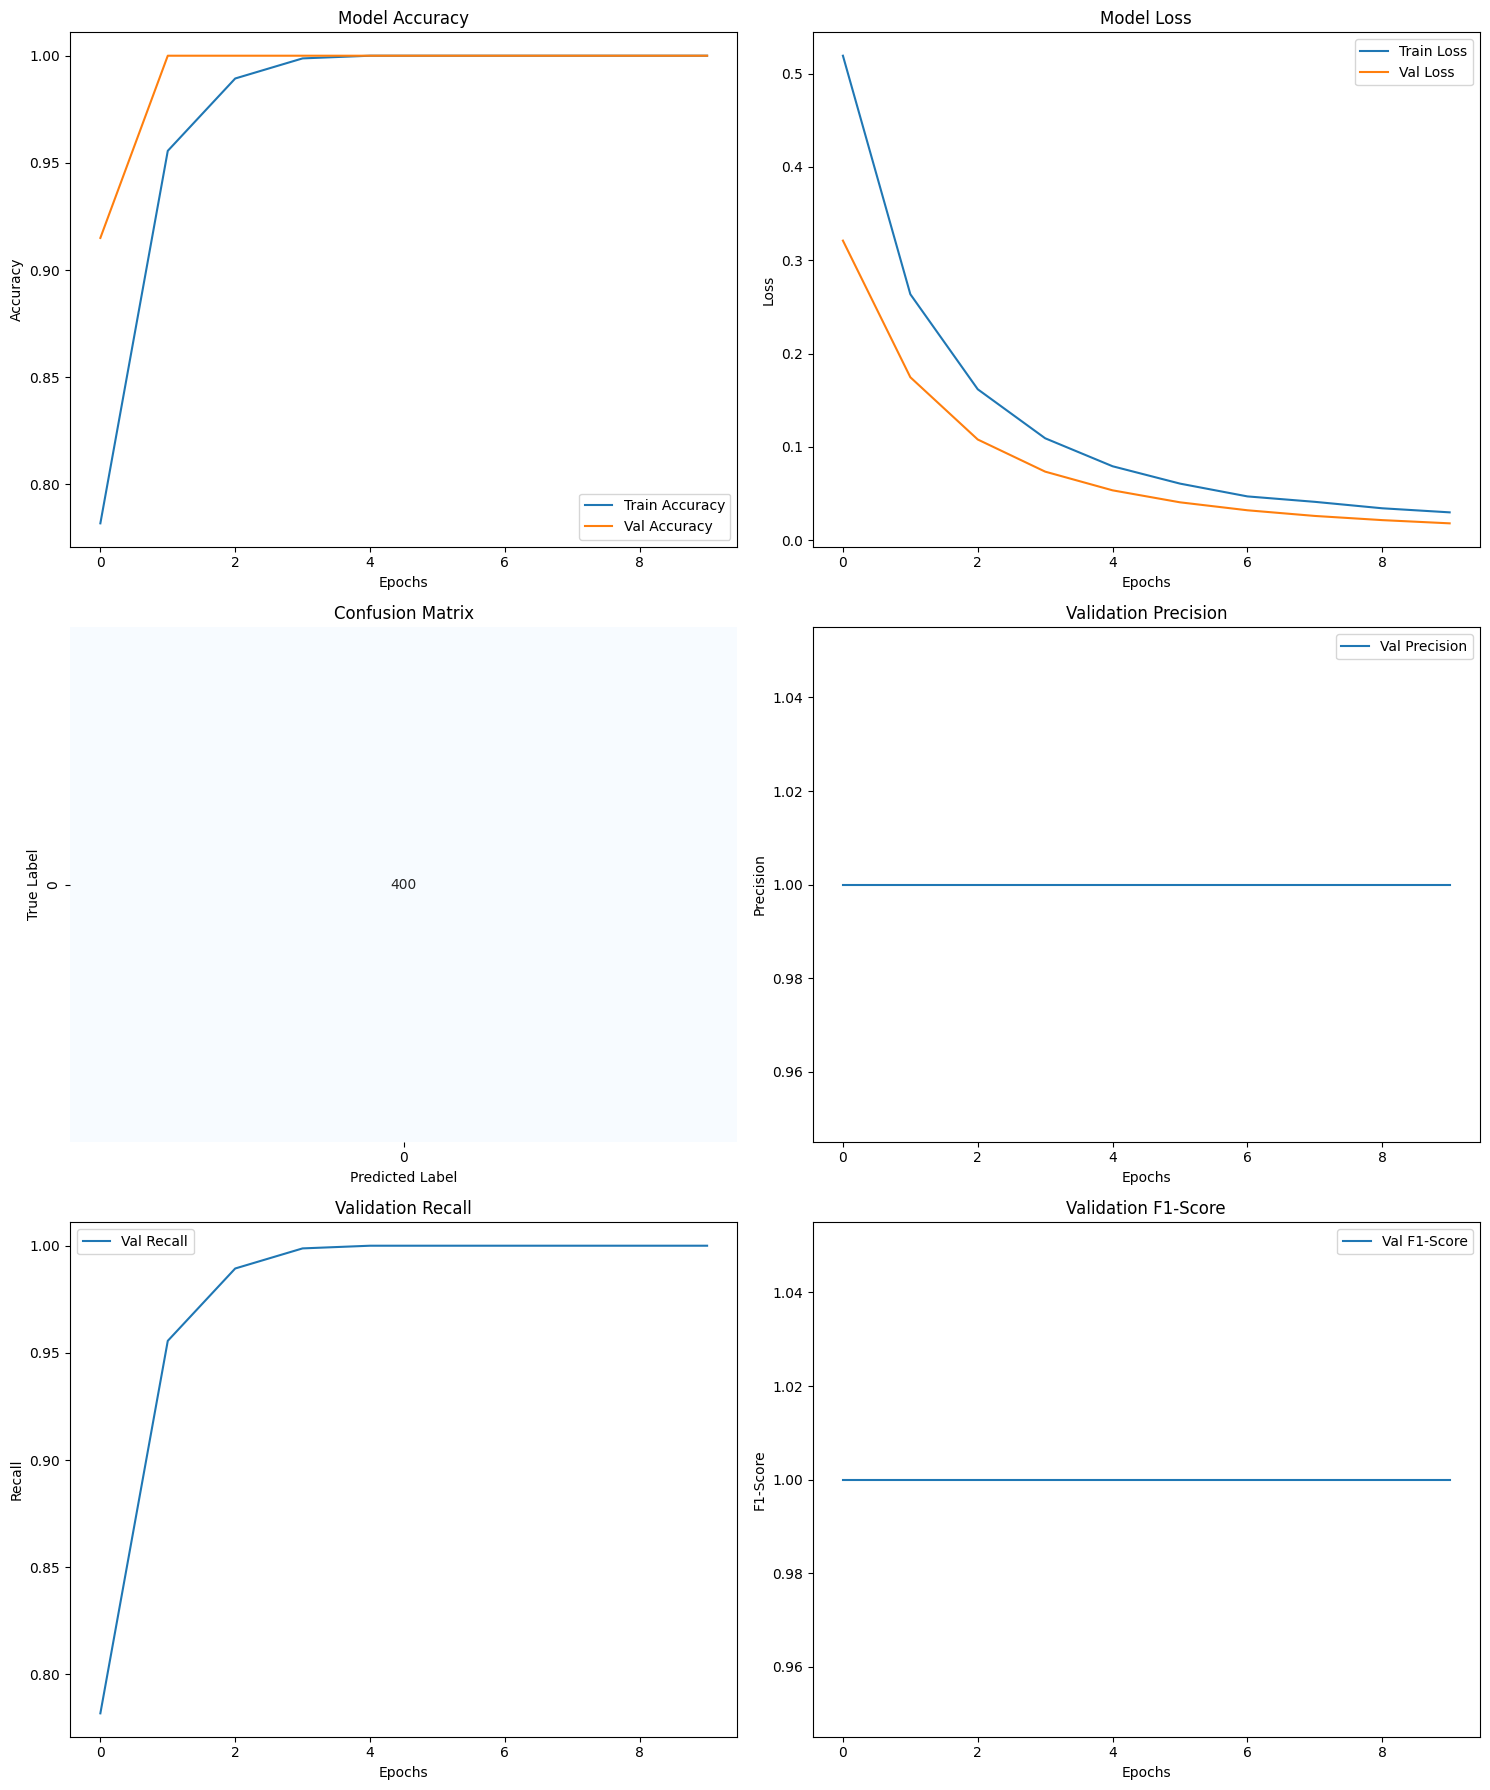

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

    
def plot_metrics(history, cm):
    """ Plot the metrics of the model """
    # Plotting all in one figure
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))

    # Plot training & validation accuracy values
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()

    # Plot training & validation loss values
    axes[0, 1].plot(history.history['loss'], label='Train Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1, 0])
    axes[1, 0].set_title("Confusion Matrix")
    axes[1, 0].set_xlabel("Predicted Label")
    axes[1, 0].set_ylabel("True Label")

    # Plot precision
    axes[1, 1].plot(history.history['Precision'], label='Val Precision')
    axes[1, 1].set_title('Validation Precision')
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Precision')
    axes[1, 1].legend()

    # Plot recall
    axes[2, 0].plot(history.history['Recall'], label='Val Recall')
    axes[2, 0].set_title('Validation Recall')
    axes[2, 0].set_xlabel('Epochs')
    axes[2, 0].set_ylabel('Recall')
    axes[2, 0].legend()

    # Plot F1-score
    axes[2, 1].plot(history.history['f1_score'], label='Val F1-Score')
    axes[2, 1].set_title('Validation F1-Score')
    axes[2, 1].set_xlabel('Epochs')
    axes[2, 1].set_ylabel('F1-Score')
    axes[2, 1].legend()

    plt.tight_layout()
    plt.show()
    return fig 

def train_LSTM(X,y):
    """ Train an LSTM model on the given data and return the trained model, history and figure of metrics """

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert DataFrames to NumPy arrays
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

    # Reshaping features for LSTM input
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Building the LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, X_train.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compiling the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'f1_score'])

    # Training the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluating the model
    loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1_score: {f1_score}")

    # Predicting on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Print confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return model, history, cm

def apply_LSTM(X, y):
    """ Apply LSTM model on the given data and return the trained model, history and figure of metrics """
    # Train the LSTM model
    model, history, cm = train_LSTM(X, y)

    # Plotting the metrics
    fig = plot_metrics(history, cm)

    # save the plt figure
    fig.savefig('figure/lstm_model_metrics.png')

    # Save the model
    model.save('models/lstm_model.h5')

    # Save the history to a text file
    with open('models/LSTM-history.txt', 'w') as f:
        f.write(str(history.history))


# Apply the LSTM model
apply_LSTM(X, y)
